In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt




In [ ]:
cars_dataset = pd.read_csv('/content/CarPrice_Assignment.csv')
display(cars_dataset)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
cars_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
missing_values = cars_dataset.isnull().sum() #checking for missing values
print(missing_values)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
# Make a copy
cars_dataset_copy = cars_dataset.copy()

# Save the copy
cars_dataset_copy.to_csv('carsRegressor.csv', index=False)

In [ ]:
label_encoder = preprocessing.LabelEncoder() #applying the encoder to convert data types thats an object to a numerical column

for i in cars_dataset.columns:
  if cars_dataset_copy[i].dtype == "object" or cars_dataset_copy[i].dtype == "category":
    cars_dataset_copy[i] = label_encoder.fit_transform(cars_dataset_copy[i]) #encoding price to numerical

In [ ]:
x1 = cars_dataset_copy.drop('price', axis=1) #dropping the price column to perform testing on it
y1 = cars_dataset_copy['price']

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30, random_state=42) #here were doing the train and test operation where 70% of it is split for the training operation
#and 30% for testing
display(x1_train)
display(x1_test)
display(y1_train)
display(y1_test)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,178,-1,125,1,0,0,2,1,0,102.4,...,2,122,5,3.31,3.54,8.7,92,4200,27,32
75,76,1,62,1,1,1,2,2,0,102.7,...,2,140,5,3.78,3.12,8.0,175,5000,19,24
174,175,-1,113,0,1,0,3,1,0,102.4,...,2,110,3,3.27,3.35,22.5,73,4500,30,33
31,32,2,43,1,0,1,2,1,0,86.6,...,2,92,0,2.91,3.41,9.2,76,6000,31,38
12,13,0,11,1,0,1,3,2,0,101.2,...,3,164,5,3.31,3.19,9.0,121,4250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,70,1,0,1,2,2,0,99.2,...,3,181,5,3.43,3.27,9.0,160,5200,19,25
14,15,1,15,1,0,0,3,2,0,103.5,...,3,164,5,3.31,3.19,9.0,121,4250,20,25
92,93,1,76,1,0,0,3,1,0,94.5,...,2,97,1,3.15,3.29,9.4,69,5200,31,37
179,180,3,120,1,0,1,2,2,0,102.9,...,3,171,5,3.27,3.35,9.3,161,5200,19,24


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,16,0,13,1,0,0,3,2,0,103.5,...,3,209,5,3.62,3.390,8.00,182,5400,16,22
9,10,0,8,1,1,1,2,0,0,99.5,...,1,131,5,3.13,3.400,7.00,160,5500,16,22
100,101,0,79,1,0,0,3,1,0,97.2,...,2,120,1,3.33,3.470,8.50,97,5200,27,34
132,133,3,101,1,0,1,2,1,0,99.1,...,2,121,5,3.54,3.070,9.31,110,5250,21,28
68,69,-1,17,0,1,0,4,2,0,110.0,...,1,183,3,3.58,3.640,21.50,123,4350,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,3,54,1,0,1,2,2,0,95.3,...,6,70,2,3.33,3.255,9.40,101,6000,17,23
128,129,3,96,1,0,1,0,2,1,89.5,...,3,194,5,3.74,2.900,9.50,207,5900,17,25
76,77,2,65,1,0,1,2,1,0,93.7,...,2,92,1,2.97,3.230,9.40,68,5500,37,41
144,145,0,108,1,0,0,3,0,0,97.0,...,2,108,1,3.62,2.640,9.00,82,4800,24,25


177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 143, dtype: float64

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

In [ ]:
k_nearest_neighbour_r = KNeighborsRegressor(n_neighbors=3)  #applying knn regressor which is an unsupervised operation to find the mean square error
k_nearest_neighbour_r.fit(x1_train, y1_train)#regressor model is trained

predictions_knn_r = k_nearest_neighbour_r.predict(x1_test)

print('.......................Mean square error..........................')
mean_sq_error = mean_squared_error(y1_test, predictions_knn_r)
print("Mean square error:",mean_sq_error)
#measures the average of the squares of the errors. the difference between the predicted values and the actual values.



.......................Mean square error..........................
Mean square error: 12978963.18954301


In [ ]:
b = 5
min_price = cars_dataset['price'].min() #the minimum price
max_price = cars_dataset['price'].max() #the maximum price
cars_dataset['discrete_price'] = pd.cut(cars_dataset['price'], bins=b, labels=False)
#discretizes the 'price' column in cars_dataset into 5 bins  to convert from continous to discrete


In [ ]:
display(cars_dataset['discrete_price'])

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    2
203    2
204    2
Name: discrete_price, Length: 205, dtype: int64

In [ ]:
print('Min price: ', min_price)
print('Max price: ', max_price) #print the minimum and maximum price


Min price:  5118.0
Max price:  45400.0


In [ ]:
print(cars_dataset.dtypes) #checking the datatypes of the dataset

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
discrete_price        int64
dtype: object


In [ ]:
label_encoder = preprocessing.LabelEncoder() #applying the encoder to convert data types thats an object to a numerical column

for i in cars_dataset.columns:
  if cars_dataset[i].dtype == "object" or cars_dataset[i].dtype == "category":
    cars_dataset[i] = label_encoder.fit_transform(cars_dataset[i])


In [ ]:
print(cars_dataset.dtypes) #after applying the encoder all columns are numerical :)

car_ID                int64
symboling             int64
CarName               int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
discrete_price        int64
dtype: object


In [ ]:
x = cars_dataset.drop('discrete_price', axis=1) #dropping the price column to perform testing on it
y = cars_dataset['discrete_price']

In [ ]:
display(x)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    2
203    2
204    2
Name: discrete_price, Length: 205, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) #here were doing the train and test operation where 70% of it is split for the training operation
#and 30% for testing
display(x_train)
display(x_test)
display(y_train)
display(y_test)



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
177,178,-1,125,1,0,0,2,1,0,102.4,...,122,5,3.31,3.54,8.7,92,4200,27,32,11248.0
75,76,1,62,1,1,1,2,2,0,102.7,...,140,5,3.78,3.12,8.0,175,5000,19,24,16503.0
174,175,-1,113,0,1,0,3,1,0,102.4,...,110,3,3.27,3.35,22.5,73,4500,30,33,10698.0
31,32,2,43,1,0,1,2,1,0,86.6,...,92,0,2.91,3.41,9.2,76,6000,31,38,6855.0
12,13,0,11,1,0,1,3,2,0,101.2,...,164,5,3.31,3.19,9.0,121,4250,21,28,20970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,70,1,0,1,2,2,0,99.2,...,181,5,3.43,3.27,9.0,160,5200,19,25,18399.0
14,15,1,15,1,0,0,3,2,0,103.5,...,164,5,3.31,3.19,9.0,121,4250,20,25,24565.0
92,93,1,76,1,0,0,3,1,0,94.5,...,97,1,3.15,3.29,9.4,69,5200,31,37,6849.0
179,180,3,120,1,0,1,2,2,0,102.9,...,171,5,3.27,3.35,9.3,161,5200,19,24,15998.0


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,13,1,0,0,3,2,0,103.5,...,209,5,3.62,3.390,8.00,182,5400,16,22,30760.000
9,10,0,8,1,1,1,2,0,0,99.5,...,131,5,3.13,3.400,7.00,160,5500,16,22,17859.167
100,101,0,79,1,0,0,3,1,0,97.2,...,120,1,3.33,3.470,8.50,97,5200,27,34,9549.000
132,133,3,101,1,0,1,2,1,0,99.1,...,121,5,3.54,3.070,9.31,110,5250,21,28,11850.000
68,69,-1,17,0,1,0,4,2,0,110.0,...,183,3,3.58,3.640,21.50,123,4350,22,25,28248.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,3,54,1,0,1,2,2,0,95.3,...,70,2,3.33,3.255,9.40,101,6000,17,23,11845.000
128,129,3,96,1,0,1,0,2,1,89.5,...,194,5,3.74,2.900,9.50,207,5900,17,25,37028.000
76,77,2,65,1,0,1,2,1,0,93.7,...,92,1,2.97,3.230,9.40,68,5500,37,41,5389.000
144,145,0,108,1,0,0,3,0,0,97.0,...,108,1,3.62,2.640,9.00,82,4800,24,25,9233.000


177    0
75     1
174    0
31     0
12     1
      ..
106    1
14     2
92     0
179    1
102    1
Name: discrete_price, Length: 143, dtype: int64

15     3
9      1
100    0
132    0
68     2
      ..
56     0
128    3
76     0
144    0
104    1
Name: discrete_price, Length: 62, dtype: int64

KNN is used for classification and regression tasks, where the prediction is based on the majority vote (for classification) or average (for regression) of the k-nearest data points in the feature space.

In [ ]:
k_nearest_neighbour_c = KNeighborsClassifier(n_neighbors=7)
k_nearest_neighbour_c.fit(x_train, y_train)#classifier model is trained
#knn classifier is a supervised labeled operation
#i chose k=11 since i found a higher accuracy with k=11

predictions_knn_c = k_nearest_neighbour_c.predict(x_test) #predicting using x_test

In [ ]:
print('.......................Accuracy..........................')
#It is used to find the portion of correctly classified values

acc_knn = accuracy_score(y_test, predictions_knn_c) #calculating the accuracy
print("Accuracy:", acc_knn)

.......................Accuracy..........................
Accuracy: 0.9354838709677419


....................Confusion matrix.......................


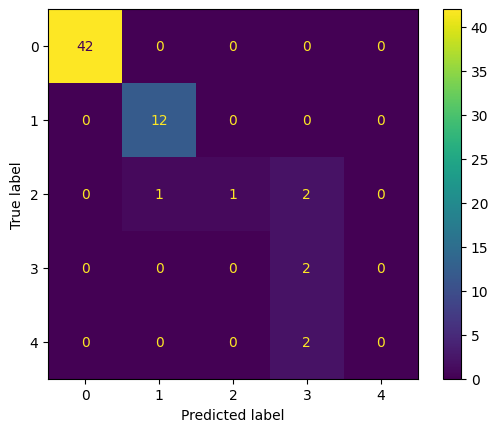

In [ ]:

print('....................Confusion matrix.......................')
confusion_matrix = confusion_matrix(y_test, predictions_knn_c) #the confusion matrix is to show the true positive, true negative, false positive, and false negative based on the actual and predicated outcomes
#one class is commonly mislabelled as the other
# Display confusion matrix
display_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display_knn.plot()


In [ ]:
print('.........................Recall............................') #recall is a performance metric that measures the proportion of actual positive cases (true positives)
recall_knn = recall_score(y_test, predictions_knn_c, average='macro')
print("Recall", recall_knn)

.........................Recall............................
Recall 0.65


In [ ]:
print('.........................Precision............................') ##Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
precision_knn = precision_score(y_test,predictions_knn_c, average='macro')
print("Precision", precision_knn)

.........................Precision............................
Precision 0.6512820512820514


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes is based on Bayes' theorem with the assumption of independence among features. It's commonly for tasks where feature independence assumption holds reasonably well.

In [ ]:
naive_bayes = GaussianNB()

naive_bayes.fit(x_train, y_train)#classifier model is trained
predictions_nb = naive_bayes.predict(x_test)

In [ ]:
print('........................Accuracy..........................')  #It is used to find the portion of correctly classified values. Indicates how often the classifier is right
acc_nb = accuracy_score(y_test, predictions_nb) #calculating the accuracy
print("Accuracy",acc_nb)


........................Accuracy..........................
Accuracy 0.8225806451612904


....................Confusion matrix.......................


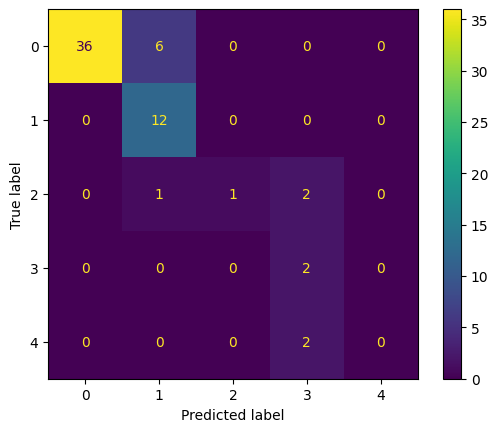

In [ ]:
print('....................Confusion matrix.......................')
confusion_matrix_nb = confusion_matrix(y_test, predictions_nb)  #the confusion matrix is to show the true positive, true negative, false positive, and false negative based on the actual and predicated outcomes
#one class is commonly mislabelled as the other
# Display confusion matrix
display_nb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_nb)
display_nb.plot()
#if u get an error re run the libaries and it will work

In [ ]:
print('.........................Recall............................')  #recall is a performance metric that measures the proportion of actual positive cases (true positives)
recall_nb = recall_score(y_test,predictions_nb,average='macro')
print("Recall", recall_nb)

.........................Recall............................
Recall 0.6214285714285714


In [ ]:
print('.........................Precision............................')#Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
precision_nb = precision_score(y_test,predictions_nb,average='macro')
print("Precision", precision_nb)

.........................Precision............................
Precision 0.5929824561403509


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree is a tree-based model used for classification and regression tasks, where the dataset is recursively split into subsets based on the value of input features

In [ ]:
decision_tree = DecisionTreeClassifier() #makes decisions based on conditions and on specific samples

decision_tree.fit(x_train, y_train) #classifier model is trained

# Make predictions on the test data
prediction_dt = decision_tree.predict(x_test)

In [ ]:
print('........................Accuracy..........................') #printing the accuracy  It is used to find the portion of correctly classified values. Indicates how often the classifier is right
acc_dt = accuracy_score(y_test, prediction_dt)
print("Accuracy", acc_dt) #the highest accuracy i got was 0.95 but it changes everytime you run

........................Accuracy..........................
Accuracy 0.9354838709677419


In [ ]:
print('.........................Recall............................')  #recall is a performance metric that measures the proportion of actual positive cases (true positives)
recall_dt = recall_score(y_test,prediction_dt,average ='macro')
print("Recall", recall_dt)

.........................Recall............................
Recall 0.75


In [ ]:
print('.........................Precision............................')#Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
precision_dt = precision_score(y_test,prediction_dt,average ='macro')
print("Precision", precision_dt)

.........................Precision............................
Precision 0.8646153846153848


....................Confusion matrix.......................


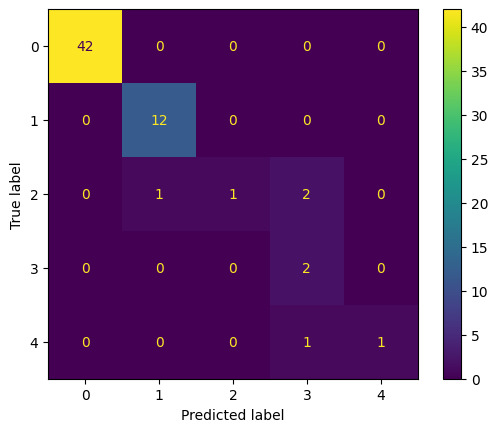

In [ ]:
print('....................Confusion matrix.......................')
confusion_matrix_dt = confusion_matrix(y_test, prediction_dt) #the confusion matrix is to show the true positive, true negative, false positive, and false negative based on the actual and predicated outcomes
#one class is commonly mislabelled as the other
# Display confusion matrix
display_dt = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
display_dt.plot()

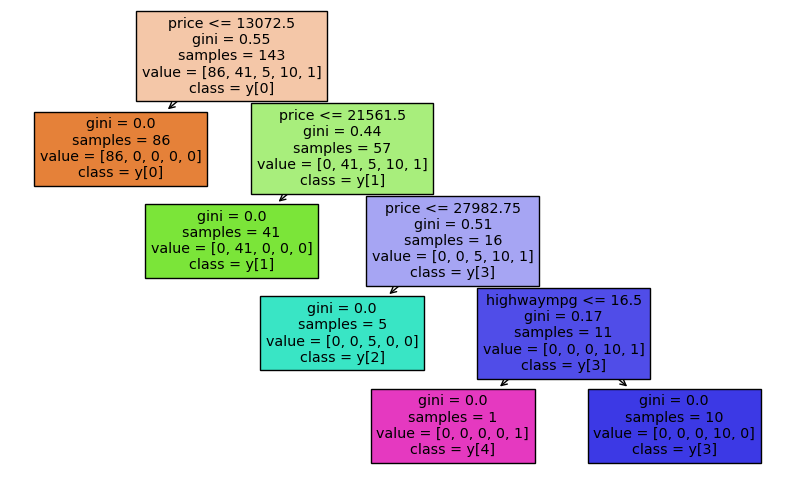

In [ ]:
plt.figure(figsize=(10, 6)) #Declaring the size
plot_tree(decision_tree, filled=True, feature_names=x_train.columns, class_names=True, precision=2) #specifying the features
plt.show() #displaying the decision tree

In [ ]:
#ranking the 3 outputs
#the best output is decison tree, followed by KNN, then lastly naive bayes